# EID 444 Homework 1

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def calc_force(r, mass, k, g, l_e):
    ''' Manually calculate the potential energy force for a pendulum
     with a spring '''
    
    r_magnitude = np.linalg.norm(r)

    force_field = (k * (l_e - r_magnitude) * (r/r_magnitude)) + np.array([0, -m * g]) 
    return force_field

# Example usage
r = np.array([1.0, 1.0])  # Example position vector
m = 2.0                   # Mass in kg
k = 10.0                  # Spring stiffness
g = 1.0                   # Gravitational acceleration
l_e = 1.5                # Equilibrium length

force = calc_force(r, m, k, g, l_e) #Gives F_x and F_y
print("Force:", force) 

Force: [ 0.60660172 -1.39339828]


# Verlet Step

In [24]:
def verlet_step(r_current, r_prev, t, m , k, g, l_e):
    ''' Calculate the verlet step of the pendulum-spring 
    system'''

    #Use precomputed values instead of calling function to save computation time
    F_current = calc_force(r_current, m, k, g, l_e)
    acceleration = F_current / m 

    r_next = (2*r_current) - r_prev + ((acceleration) * (t**2))

    return r_next



In [ ]:
def simulation(r_0, v_0, t, t_max, m, k, g, l_e):
    '''Runs the simulation by performing the verlet_step the desired 
    number of times '''

    n_steps = int(t_max / t)
    trajectory = np.empty((n_steps,2))

    r_prev = r_0
    r_current = r_prev + (v_0 * t)

    trajectory[0] = r_prev
    trajectory[1] = r_current

    for step in range(2, n_steps):
        
        r_next = verlet_step(trajectory[step - 1], trajectory[step - 2], t, m, k, g, l_e)
        trajectory[step] = r_next
        r_previous = trajectory[step - 1]
    
    return trajectory
 

# Plot and Animate Trajectory

In [26]:
def plot_traj(trajectory):
    ''' Plots the trajectory on a grid'''

    plt.figure()
    plt.plot(trajectory[:, 0], trajectory[:, 1], label = 'Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Simulated Trajectory')
    plt.axis('equal')
    plt.legend()
    plt.show()

def animate_traj(trajectory):
    '''Animates trajectory and saves it as a GIF'''

    fig,ax = plt.subplots()
    ax.set_xlim(np.min(trajectory[:, 0]) - 1, np.max(trajectory[:, 0]) + 1)
    ax.set_ylim(np.min(trajectory[:, 1]) - 1, np.max(trajectory[:, 1]) + 1)
    ax.set_aspect('equal')

    point, = ax.plot([], [], 'bo')  # The mass
    spring, = ax.plot([], [], 'r-', lw=2)  # The spring

    def update(frame):
        point.set_data(trajectory[frame, 0], trajectory[frame, 1])
        spring.set_data([0, trajectory[frame, 0]], [0, trajectory[frame, 1]])
        return point, spring

    ani = animation.FuncAnimation(fig, update, frames=range(0, len(trajectory), 10), blit=True, interval=50)
    ani.save("trajectory.gif", writer="pillow")
    plt.show()






# Simple Drop from Stationary

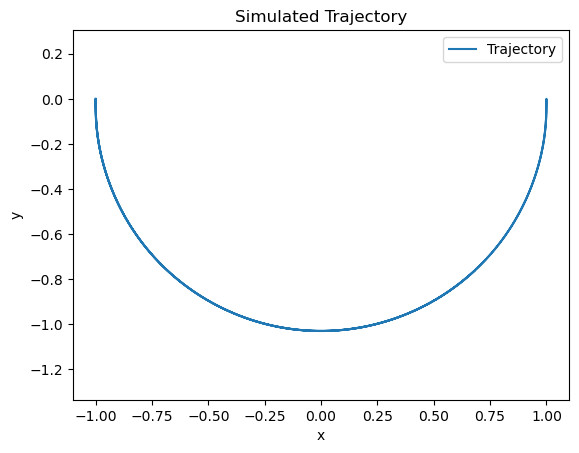

C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])
C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])


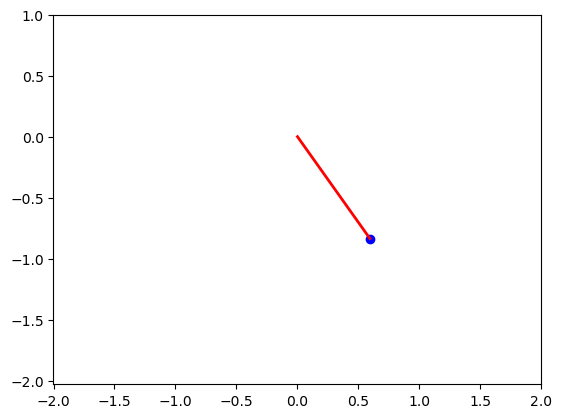

In [29]:
r_0 = np.array([-1,0])
v_0 = np.array([0,0])
t = 0.01
t_max = 10
m = 1
k = 100
g = 1
l_e = 1

traj_simp_stat = simulation(r_0, v_0, t, t_max, m, k, g, l_e)
plot_traj(traj_simp_stat)
animate_traj(traj_simp_stat)

# Simple Spring Oscillation


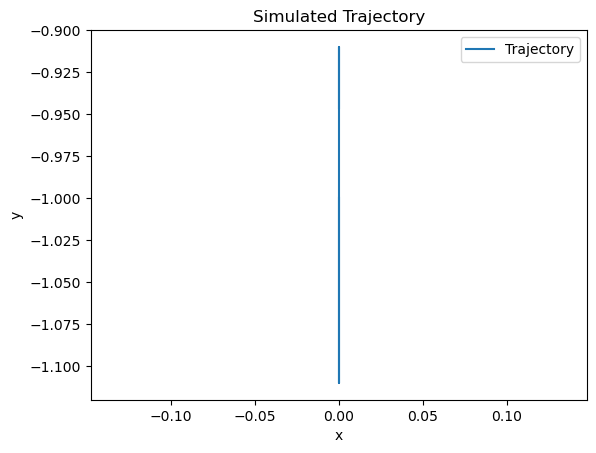

C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])
C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])


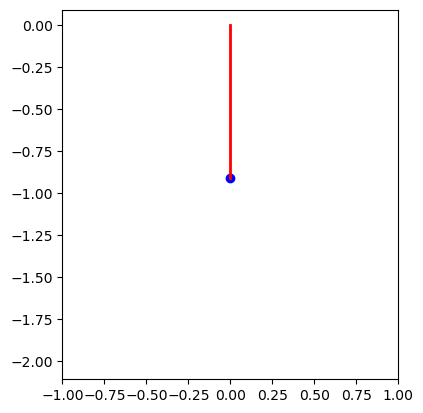

In [28]:
r_0 = np.array([0,-1])
v_0 = np.array([0,-1])
t = 0.01
t_max = 10
m = 1
k = 100
g = 1
l_e = 1

traj_simp_oscill = simulation(r_0, v_0, t, t_max, m, k, g, l_e)
plot_traj(traj_simp_oscill)
animate_traj(traj_simp_oscill)

# Drop and Oscillation

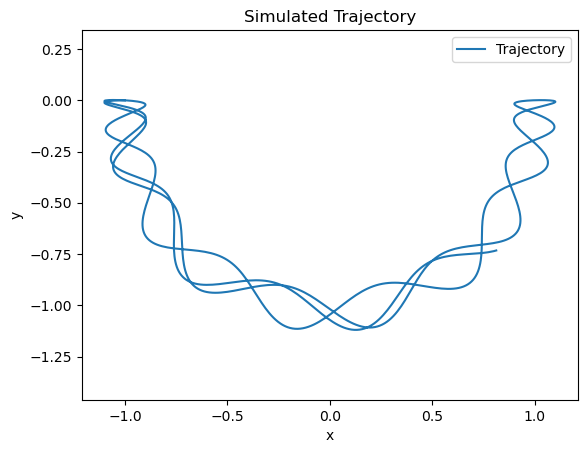

C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])
C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])


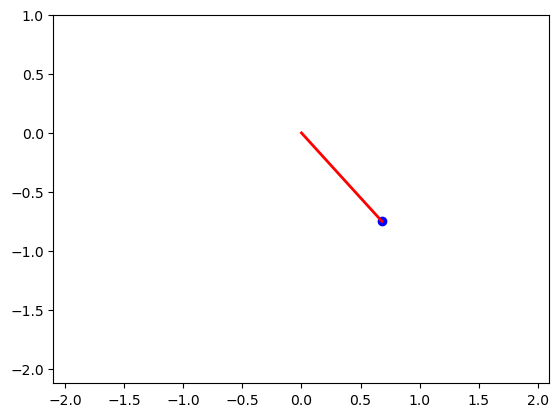

In [30]:
r_0 = np.array([-1,0])
v_0 = np.array([-1,0])
t = 0.01
t_max = 10
m = 1
k = 100
g = 1
l_e = 1

traj_drop_oscill = simulation(r_0, v_0, t, t_max, m, k, g, l_e)
plot_traj(traj_drop_oscill)
animate_traj(traj_drop_oscill)

# Zero Gravity

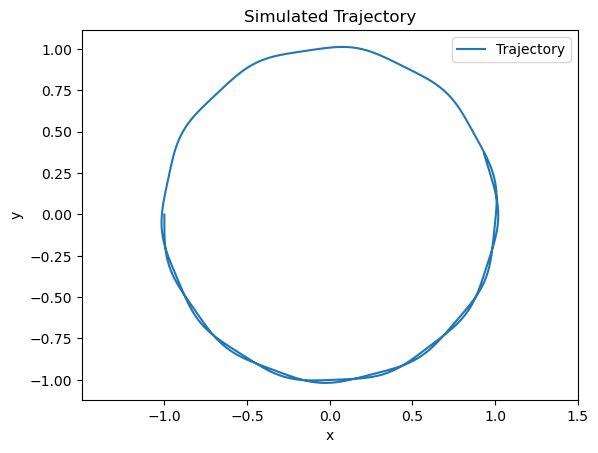

C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])
C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])


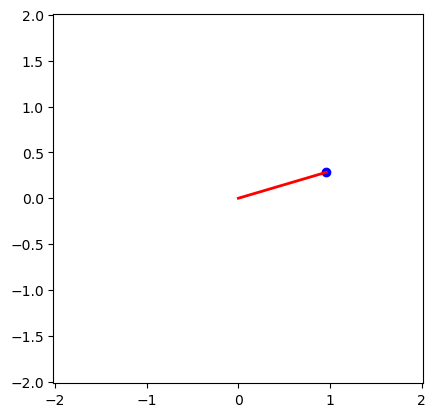

In [31]:
r_0 = np.array([-1,0])
v_0 = np.array([0,-1])
t = 0.01
t_max = 10
m = 1
k = 100
g = 0
l_e = 1

traj_zero_grav = simulation(r_0, v_0, t, t_max, m, k, g, l_e)
plot_traj(traj_zero_grav)
animate_traj(traj_zero_grav)

# Super Gravity

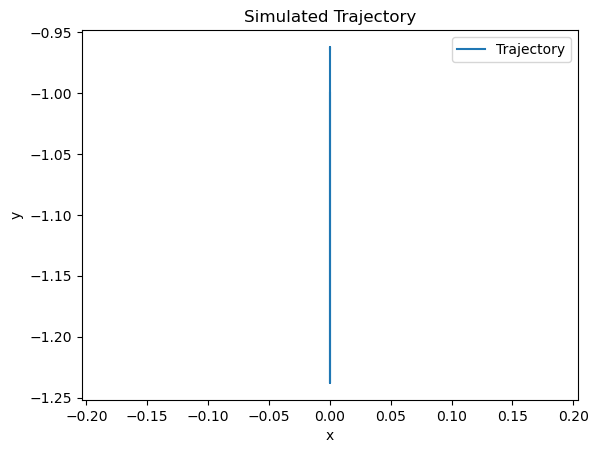

C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])
C:\Users\mo241\AppData\Local\Temp\ipykernel_22396\1782706618.py:25: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(trajectory[frame, 0], trajectory[frame, 1])


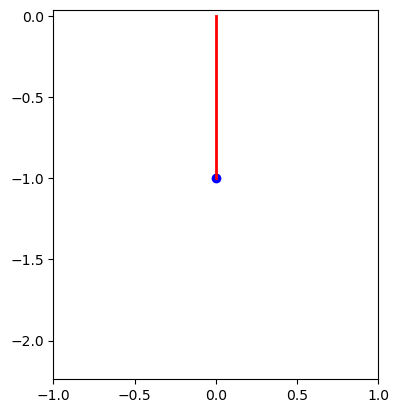

In [32]:
r_0 = np.array([0,-1])
v_0 = np.array([0,-1])
t = 0.01
t_max = 10
m = 1
k = 100
g = 10
l_e = 1

traj_super_grav = simulation(r_0, v_0, t, t_max, m, k, g, l_e)
plot_traj(traj_super_grav)
animate_traj(traj_super_grav)

# Question 4 - Analyzing Change in Time Step

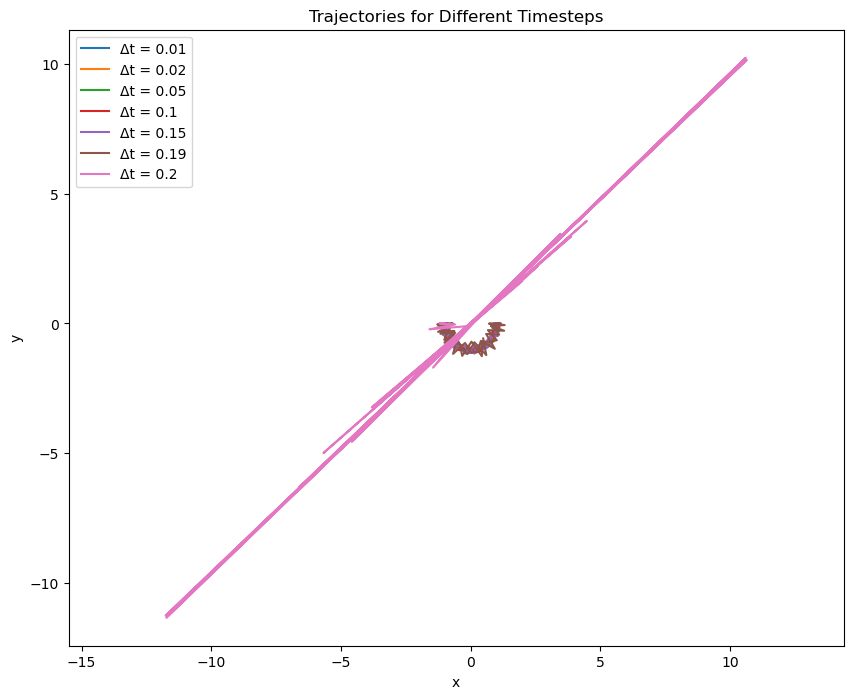

In [49]:
r_0 = np.array([-1,0])
v_0 = np.array([-1,0])
t = [0.01, 0.02, 0.05, 0.1, 0.15, 0.19, 0.20]
t_max = 10
m = 1
k = 100
g = 1
l_e = 1

plt.figure(figsize=(10, 8))

for step in range(len(t)):
    traj_drop_oscill = simulation(r_0, v_0, t[step], t_max, m, k, g, l_e)
    plt.plot(traj_drop_oscill[:, 0], traj_drop_oscill[:, 1], label=f"Δt = {t[step]}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectories for Different Timesteps")
plt.axis("equal")
plt.legend()
plt.show()

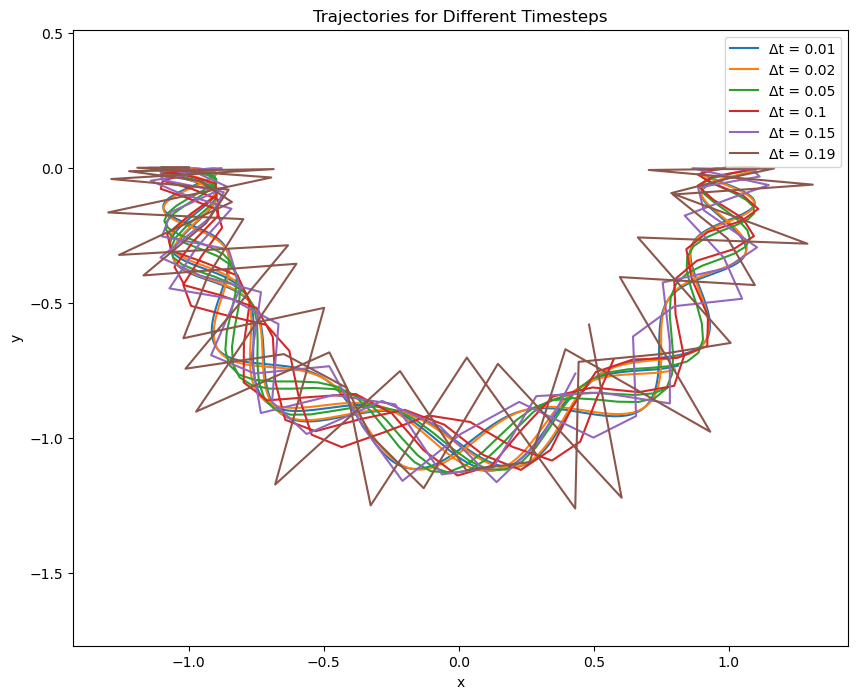

In [50]:
r_0 = np.array([-1,0])
v_0 = np.array([-1,0])
t = [0.01, 0.02, 0.05, 0.1, 0.15, 0.19]
t_max = 10
m = 1
k = 100
g = 1
l_e = 1

plt.figure(figsize=(10, 8))

for step in range(len(t)):
    traj_drop_oscill = simulation(r_0, v_0, t[step], t_max, m, k, g, l_e)
    plt.plot(traj_drop_oscill[:, 0], traj_drop_oscill[:, 1], label=f"Δt = {t[step]}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectories for Different Timesteps")
plt.axis("equal")
plt.legend()
plt.show()